# Title: Predicting XYZ 

- The goal of this mini project is to predict XYZ
- Using models X and Y, this model will predict
    * A
    * B
- Using models A and B, this model will cluster
    
#### What is the dataset?

* Describe the dataset. 

(A) The dataset I worked with is a comprehensive collection of traffic accident records for the year 2021. It includes detailed information about each accident, such as the case number, year, state, county, number of fatalities, and various other factors that could potentially contribute to the accident. The data is divided into three files ACC_AUX.CSV, VEH_AUX.CSV, and PER_AUX.CSV

* More description.


## 1. Setting the environment
### Describe the environment
##### Sub sub title
* Describe the environment
(A) I heavily relied on Pandas for data manipulation and exploration, which was instrumental in handling the large traffic accident dataset. For data visualization, I utilized Matplotlib and Seaborn, which allowed me to create insightful plots and graphs to understand the patterns and distributions within the data effectively.I also utilized Plotly, a dynamic plotting library, to create interactive visuals that offered deeper insights with their ability to zoom, pan, and hover for more information. This was particularly useful in understanding complex relationships and trends.

For the machine learning part of my project, I used Scikit-learn, a powerful and versatile library in Python. This library provided me with the necessary tools to implement both supervised and unsupervised learning algorithms. Specifically, I used Linear Regression for predicting fatalities in traffic accidents and K-Means clustering for grouping data into clusters to uncover hidden patterns.



* Describe your approach

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Plotly Packages
from plotly import tools
#import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline



C:\Users\malen\AppData\Local\Temp\ipykernel_23644\1298858818.py:28: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ModuleNotFoundError: No module named 'folium'

## 2. Data preparation and data cleaning

Include here any:
* Data cleaning steps
* Feature removal
* Data imputation
* Data linking, etc.


In [2]:
# reading the files 

df_veh_aux = pd.read_csv('../datasets/VEH_AUX.CSV')
df_veh_aux.head()

,YEAR,ST_CASE,VEH_NO,A_DRDIS,A_DRDRO,A_VRD,A_BODY,A_IMP1,A_IMP2,A_VROLL,A_LIC_S,A_LIC_C,A_CDL_S,A_MC_L_S,A_SPVEH,A_SBUS,A_MOD_YR,A_FIRE_EXP
0,2021,10001,1,2,2,2,3,2,NaN,2,2,2,2,4,2,3,2016,1
1,2021,10001,2,2,2,2,3,2,NaN,2,1,1,2,4,2,3,2021,1
2,2021,10002,1,2,2,1,1,2,NaN,2,1,1,2,4,1,3,2004,1
3,2021,10003,1,2,2,1,1,2,NaN,2,1,1,2,4,2,3,2009,1
4,2021,10004,1,2,2,1,3,2,NaN,2,1,1,2,4,2,3,2020,1


In [3]:
# check if there are missing values 

missing_values = df_veh_aux.isnull().sum()
print(missing_values)

YEAR              0
ST_CASE           0
VEH_NO            0
A_DRDIS           0
A_DRDRO           0
A_VRD             0
A_BODY            0
A_IMP1            0
A_IMP2        61332
A_VROLL           0
A_LIC_S           0
A_LIC_C           0
A_CDL_S           0
A_MC_L_S          0
A_SPVEH           0
A_SBUS            0
A_MOD_YR          0
A_FIRE_EXP        0
dtype: int64


In [4]:
# drop missing value columns 
df_veh_aux = df_veh_aux.drop(columns=['A_IMP2'])
df_veh_aux.head()

,YEAR,ST_CASE,VEH_NO,A_DRDIS,A_DRDRO,A_VRD,A_BODY,A_IMP1,A_VROLL,A_LIC_S,A_LIC_C,A_CDL_S,A_MC_L_S,A_SPVEH,A_SBUS,A_MOD_YR,A_FIRE_EXP
0,2021,10001,1,2,2,2,3,2,2,2,2,2,4,2,3,2016,1
1,2021,10001,2,2,2,2,3,2,2,1,1,2,4,2,3,2021,1
2,2021,10002,1,2,2,1,1,2,2,1,1,2,4,1,3,2004,1
3,2021,10003,1,2,2,1,1,2,2,1,1,2,4,2,3,2009,1
4,2021,10004,1,2,2,1,3,2,2,1,1,2,4,2,3,2020,1


In [5]:
df_veh_aux.describe()

,YEAR,ST_CASE,VEH_NO,A_DRDIS,A_DRDRO,A_VRD,A_BODY,A_IMP1,A_VROLL,A_LIC_S,A_LIC_C,A_CDL_S,A_MC_L_S,A_SPVEH,A_SBUS,A_MOD_YR,A_FIRE_EXP
count,61332.0,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000,61332.000000
mean,2021.0,273223.874878,1.603796,1.945444,1.989858,1.678308,3.125416,2.750179,1.853845,1.523251,1.271799,1.931749,3.740070,1.816360,2.997342,2268.772191,1.036816
std,0.0,164078.026733,3.506003,0.227112,0.100194,0.467129,2.354792,1.457871,0.353265,0.966965,0.542215,0.395436,0.799555,0.387193,0.071844,1414.492107,0.188311
min,2021.0,10001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1921.000000,1.000000
25%,2021.0,122222.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,4.000000,2.000000,3.000000,2005.000000,1.000000
50%,2021.0,261009.500000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,4.000000,2.000000,3.000000,2011.000000,1.000000
75%,2021.0,420790.250000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,1.000000,2.000000,4.000000,2.000000,3.000000,2017.000000,1.000000
max,2021.0,560104.000000,130.000000,2.000000,2.000000,2.000000,9.000000,7.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,3.000000,9999.000000,2.000000


In [6]:
# reading the file and print the head 

df_per_aux = pd.read_csv('../datasets/PER_AUX.CSV')
df_per_aux.head()

,A_AGE1,A_AGE2,A_AGE3,A_AGE4,A_AGE5,A_AGE6,A_AGE7,A_AGE8,A_AGE9,ST_CASE,...,A_RESTUSE,A_HELMUSE,A_ALCTES,A_HISP,A_RCAT,A_HRACE,A_EJECT,A_PERINJ,A_LOC,A_DOA
0,3,4,7,4,4,4,6,3,2,10001,...,1,2,1,1,2,3,1,1,1,1
1,1,1,1,1,1,1,1,1,1,10001,...,1,2,3,0,0,0,1,6,1,5
2,3,4,7,4,4,4,6,2,2,10001,...,1,2,1,1,4,5,1,1,1,1
3,3,4,7,4,4,4,6,3,2,10002,...,1,2,3,1,2,3,1,1,1,1
4,3,4,7,4,4,4,6,3,2,10002,...,1,2,3,1,2,3,1,1,1,1


In [7]:
missing_values = df_veh_aux.isnull().sum()
print(missing_values)

YEAR          0
ST_CASE       0
VEH_NO        0
A_DRDIS       0
A_DRDRO       0
A_VRD         0
A_BODY        0
A_IMP1        0
A_VROLL       0
A_LIC_S       0
A_LIC_C       0
A_CDL_S       0
A_MC_L_S      0
A_SPVEH       0
A_SBUS        0
A_MOD_YR      0
A_FIRE_EXP    0
dtype: int64


In [8]:
df_per_aux.describe()

,A_AGE1,A_AGE2,A_AGE3,A_AGE4,A_AGE5,A_AGE6,A_AGE7,A_AGE8,A_AGE9,ST_CASE,...,A_RESTUSE,A_HELMUSE,A_ALCTES,A_HISP,A_RCAT,A_HRACE,A_EJECT,A_PERINJ,A_LOC,A_DOA
count,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,...,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000,96747.000000
mean,2.966738,4.069770,7.867955,4.618262,4.969973,4.977891,6.909393,3.526249,1.955275,271411.521515,...,1.659173,2.057056,2.807229,0.675070,1.009933,1.527117,1.107662,3.780861,1.185742,3.598561
std,0.914428,1.330758,2.536921,1.860214,2.324949,2.313088,2.446027,1.801811,0.316830,164586.890214,...,0.776635,0.367934,1.218686,0.923598,1.960628,2.486150,0.351226,2.484186,0.602490,1.701510
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10001.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,6.000000,3.000000,3.000000,3.000000,5.000000,2.000000,2.000000,121969.000000,...,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,5.000000,8.000000,5.000000,5.000000,5.000000,7.000000,3.000000,2.000000,260877.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,5.000000
75%,4.000000,5.000000,10.000000,6.000000,7.000000,7.000000,9.000000,5.000000,2.000000,420714.000000,...,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,6.000000,1.000000,5.000000
max,5.000000,6.000000,13.000000,8.000000,10.000000,10.000000,12.000000,7.000000,3.000000,560104.000000,...,3.000000,3.000000,5.000000,3.000000,8.000000,9.000000,3.000000,6.000000,5.000000,5.000000


In [9]:
df_acc_aux = pd.read_csv('../datasets/ACC_AUX.CSV')
df_acc_aux.head()

,ST_CASE,YEAR,STATE,COUNTY,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,...,A_D65PLS,A_D21_24,A_D16_24,A_RD,A_HR,A_DIST,A_DROWSY,BIA,SPJ_INDIAN,INDIAN_RES
0,10001,2021,1,115,2,1,4,2,1,1,...,2,2,2,2,2,2,2,0,0,0
1,10002,2021,1,73,2,1,4,2,1,3,...,2,2,2,1,2,2,2,0,0,0
2,10003,2021,1,73,1,1,4,2,1,2,...,2,2,1,1,2,2,2,0,0,0
3,10004,2021,1,117,1,1,4,2,1,4,...,2,2,2,1,2,2,2,0,0,0
4,10005,2021,1,73,1,1,4,1,1,1,...,2,2,2,2,2,2,2,0,0,0


In [10]:
missing_values = df_acc_aux.isnull().sum()
print(missing_values)

ST_CASE       0
YEAR          0
STATE         0
COUNTY        0
FATALS        0
A_CRAINJ      0
A_REGION      0
A_RU          0
A_INTER       0
A_RELRD       0
A_INTSEC      0
A_ROADFC      0
A_JUNC        0
A_MANCOL      0
A_TOD         0
A_DOW         0
A_CT          0
A_WEATHER     0
A_LT          0
A_MC          0
A_SPCRA       0
A_PED         0
A_PED_F       0
A_PEDAL       0
A_PEDAL_F     0
A_ROLL        0
A_POLPUR      0
A_POSBAC      0
A_D15_19      0
A_D16_19      0
A_D15_20      0
A_D16_20      0
A_D65PLS      0
A_D21_24      0
A_D16_24      0
A_RD          0
A_HR          0
A_DIST        0
A_DROWSY      0
BIA           0
SPJ_INDIAN    0
INDIAN_RES    0
dtype: int64


In [11]:
df_acc_aux.describe()

,ST_CASE,YEAR,STATE,COUNTY,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,...,A_D65PLS,A_D21_24,A_D16_24,A_RD,A_HR,A_DIST,A_DROWSY,BIA,SPJ_INDIAN,INDIAN_RES
count,39508.000000,39508.0,39508.000000,39508.000000,39508.000000,39508.0,39508.000000,39508.000000,39508.000000,39508.000000,...,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000
mean,273665.421256,2021.0,27.276121,93.100992,1.086843,1.0,5.409841,1.617925,1.878759,2.045636,...,1.810646,1.866584,1.752379,1.509973,1.929559,1.918725,1.984256,0.006581,0.004404,0.007695
std,163688.977398,0.0,16.379539,99.379705,0.354078,0.0,2.331066,0.497585,0.344300,1.400895,...,0.391795,0.340028,0.431636,0.499907,0.255893,0.273260,0.124484,0.080857,0.066218,0.087382
min,10001.000000,2021.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,122289.750000,2021.0,12.000000,31.000000,1.000000,1.0,4.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,270053.500000,2021.0,27.000000,71.000000,1.000000,1.0,5.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
75%,420680.250000,2021.0,42.000000,115.000000,1.000000,1.0,7.000000,2.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
max,560104.000000,2021.0,56.000000,999.000000,13.000000,1.0,10.000000,3.000000,3.000000,6.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [12]:
# to check the ST_case in each file 

print(df_acc_aux['ST_CASE'].head())
print(df_per_aux['ST_CASE'].head())
print(df_veh_aux['ST_CASE'].head())

0    10001
1    10002
2    10003
3    10004
4    10005
Name: ST_CASE, dtype: int64
0    10001
1    10001
2    10001
3    10002
4    10002
Name: ST_CASE, dtype: int64
0    10001
1    10001
2    10002
3    10003
4    10004
Name: ST_CASE, dtype: int64


In [13]:
# merging the files and check if there is a duplicat rows 

merged_veh_per = pd.merge(df_veh_aux, df_per_aux, on='ST_CASE', how='inner')
merged_all = pd.merge(df_acc_aux, merged_veh_per, on='ST_CASE', how='inner')

duplicate_rows = merged_all.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

duplicate_columns = merged_all.columns.duplicated().sum()
print("Number of duplicate columns:", duplicate_columns)

if duplicate_rows > 0:
    merged_all = merged_all.drop_duplicates()
    print("Duplicate rows dropped.")

    
merged_all = merged_all.loc[:,~merged_all.columns.duplicated()]
print(merged_all.head())

merged_all.head()
merged_all.info()

Number of duplicate rows: 0
Number of duplicate columns: 0
   ST_CASE  YEAR  STATE  COUNTY  FATALS  A_CRAINJ  A_REGION  A_RU  A_INTER  \
0    10001  2021      1     115       2         1         4     2        1   
1    10001  2021      1     115       2         1         4     2        1   
2    10001  2021      1     115       2         1         4     2        1   
3    10001  2021      1     115       2         1         4     2        1   
4    10001  2021      1     115       2         1         4     2        1   

   A_RELRD  ...  A_RESTUSE  A_HELMUSE  A_ALCTES  A_HISP  A_RCAT  A_HRACE  \
0        1  ...          1          2         1       1       2        3   
1        1  ...          1          2         3       0       0        0   
2        1  ...          1          2         1       1       4        5   
3        1  ...          1          2         1       1       2        3   
4        1  ...          1          2         3       0       0        0   

   A_EJECT  A_P

In [16]:
# Compare YEAR_x and 'YEAR_y' to check if they are the same
same_year = (merged_all['YEAR_x'] == merged_all['YEAR_y']).all()
print(f"YEAR_x and YEAR_y are same {same_year}")

# Compare VEH_NO_x and y  
same_veh_no = (merged_all['VEH_NO_x'] == merged_all['VEH_NO_y']).all()
print(f"VEH_NO_x and VEH_NO_y are the same: {same_veh_no}")

# Drop duplicate columns 
if same_year:
    merged_all.drop(columns=['YEAR_y'], inplace=True)
if same_veh_no:
    merged_all.drop(columns=['VEH_NO_y'], inplace=True)

# rename columns 
if not same_year or not same_veh_no:
    merged_all.rename(columns={'YEAR_x': 'Year_Accident', 'YEAR_y': 'Year_Vehicle',
                               'VEH_NO_x': 'Vehicle_No_Accident', 'VEH_NO_y': 'Vehicle_No_Person'}, inplace=True)

# Check the updated dataframe
print(merged_all.head())

YEAR_x and YEAR_y are same True
VEH_NO_x and VEH_NO_y are the same: False
   ST_CASE  YEAR  STATE  COUNTY  FATALS  A_CRAINJ  A_REGION  A_RU  A_INTER  \
0    10001  2021      1     115       2         1         4     2        1   
1    10001  2021      1     115       2         1         4     2        1   
2    10001  2021      1     115       2         1         4     2        1   
3    10001  2021      1     115       2         1         4     2        1   
4    10001  2021      1     115       2         1         4     2        1   

   A_RELRD  ...  A_RESTUSE  A_HELMUSE  A_ALCTES  A_HISP  A_RCAT  A_HRACE  \
0        1  ...          1          2         1       1       2        3   
1        1  ...          1          2         3       0       0        0   
2        1  ...          1          2         1       1       4        5   
3        1  ...          1          2         1       1       2        3   
4        1  ...          1          2         3       0       0        0   



In [17]:
merged_all.head()
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198458 entries, 0 to 198457
Data columns (total 80 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   ST_CASE              198458 non-null  int64
 1   YEAR                 198458 non-null  int64
 2   STATE                198458 non-null  int64
 3   COUNTY               198458 non-null  int64
 4   FATALS               198458 non-null  int64
 5   A_CRAINJ             198458 non-null  int64
 6   A_REGION             198458 non-null  int64
 7   A_RU                 198458 non-null  int64
 8   A_INTER              198458 non-null  int64
 9   A_RELRD              198458 non-null  int64
 10  A_INTSEC             198458 non-null  int64
 11  A_ROADFC             198458 non-null  int64
 12  A_JUNC               198458 non-null  int64
 13  A_MANCOL             198458 non-null  int64
 14  A_TOD                198458 non-null  int64
 15  A_DOW                198458 non-null  int64
 16  A_

In [18]:
merged_all.describe()

,ST_CASE,YEAR,STATE,COUNTY,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,...,A_RESTUSE,A_HELMUSE,A_ALCTES,A_HISP,A_RCAT,A_HRACE,A_EJECT,A_PERINJ,A_LOC,A_DOA
count,198458.000000,198458.0,198458.000000,198458.000000,198458.000000,198458.0,198458.000000,198458.000000,198458.000000,198458.000000,...,198458.000000,198458.000000,198458.000000,198458.000000,198458.000000,198458.000000,198458.000000,198458.00000,198458.000000,198458.000000
mean,288221.088613,2021.0,28.731429,123.328281,1.620726,1.0,5.538608,1.670691,1.755712,1.378896,...,1.513116,2.021249,2.839190,0.530450,0.778230,1.196031,1.084083,4.26787,1.110799,3.905144
std,168603.874163,0.0,16.873539,135.456311,1.487051,0.0,2.204634,0.475135,0.435606,0.968804,...,0.732847,0.305099,1.117995,0.868099,1.764742,2.294266,0.325634,2.37916,0.485585,1.612469
min,10001.000000,2021.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000
25%,122788.000000,2021.0,12.000000,33.000000,1.000000,1.0,4.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,3.000000
50%,290449.000000,2021.0,29.000000,79.000000,1.000000,1.0,6.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,6.00000,1.000000,5.000000
75%,471240.000000,2021.0,47.000000,141.000000,1.000000,1.0,7.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,6.00000,1.000000,5.000000
max,560104.000000,2021.0,56.000000,999.000000,13.000000,1.0,10.000000,3.000000,3.000000,6.000000,...,3.000000,3.000000,5.000000,3.000000,8.000000,9.000000,3.000000,6.00000,5.000000,5.000000


In [19]:
merged_all.head()

,ST_CASE,YEAR,STATE,COUNTY,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,...,A_RESTUSE,A_HELMUSE,A_ALCTES,A_HISP,A_RCAT,A_HRACE,A_EJECT,A_PERINJ,A_LOC,A_DOA
0,10001,2021,1,115,2,1,4,2,1,1,...,1,2,1,1,2,3,1,1,1,1
1,10001,2021,1,115,2,1,4,2,1,1,...,1,2,3,0,0,0,1,6,1,5
2,10001,2021,1,115,2,1,4,2,1,1,...,1,2,1,1,4,5,1,1,1,1
3,10001,2021,1,115,2,1,4,2,1,1,...,1,2,1,1,2,3,1,1,1,1
4,10001,2021,1,115,2,1,4,2,1,1,...,1,2,3,0,0,0,1,6,1,5


# 3. Descriptive statistics

* Show plots about the features
* Boxplots, distributions, histograms, etc.
* What do the descriptive stats tell you about the dataset.

(A)  These observations suggest potential areas for targeted safety interventions, such as traffic management solutions to address high-incident times of day, and vehicle safety features tailored to the most commonly involved vehicle types.
* Describe some salient stats that you found interesting, why? 
(A) Weekday vs. Weekend Accidents: The distribution of accidents across weekdays and weekends was an interesting aspect. If weekdays showed a higher frequency, it could be attributed to the increased commuter and business traffic. A weekend prevalence might suggest leisure or non-routine travel contributing more significantly to accidents.

Also, Age Group Involvement-  it is  distribution of crashes involving different age groups was particularly insightful. It highlighted which age groups were more frequently involved in accidents. For instance, if younger age groups (like 16-24 yrs) had a higher count, it could imply issues like inexperience, risk-taking behavior, or distracted driving being more prevalent among younger drivers.

               A_TOD          A_DOW         A_BODY
count  198458.000000  198458.000000  198458.000000
mean        1.434495       1.365649       2.991031
std         0.501282       0.483263       2.184031
min         1.000000       1.000000       1.000000
25%         1.000000       1.000000       1.000000
50%         1.000000       1.000000       3.000000
75%         2.000000       2.000000       3.000000
max         3.000000       3.000000       9.000000


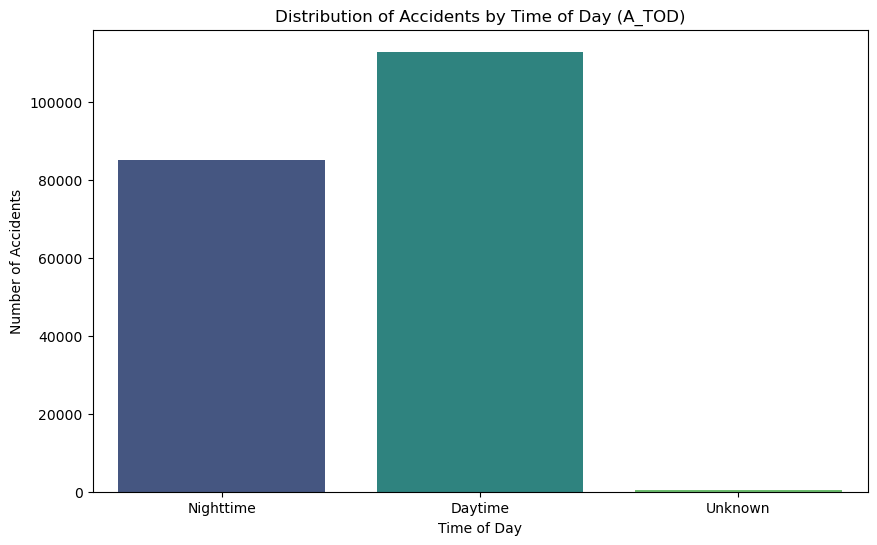

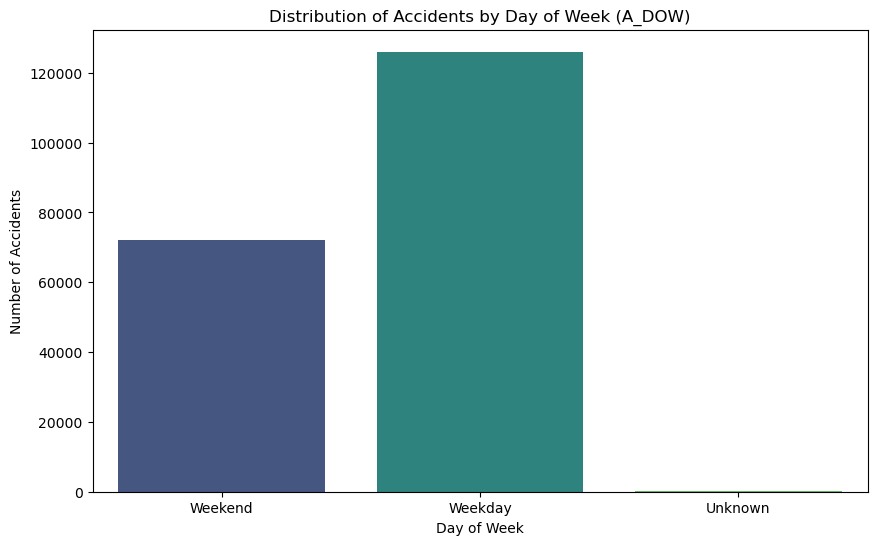

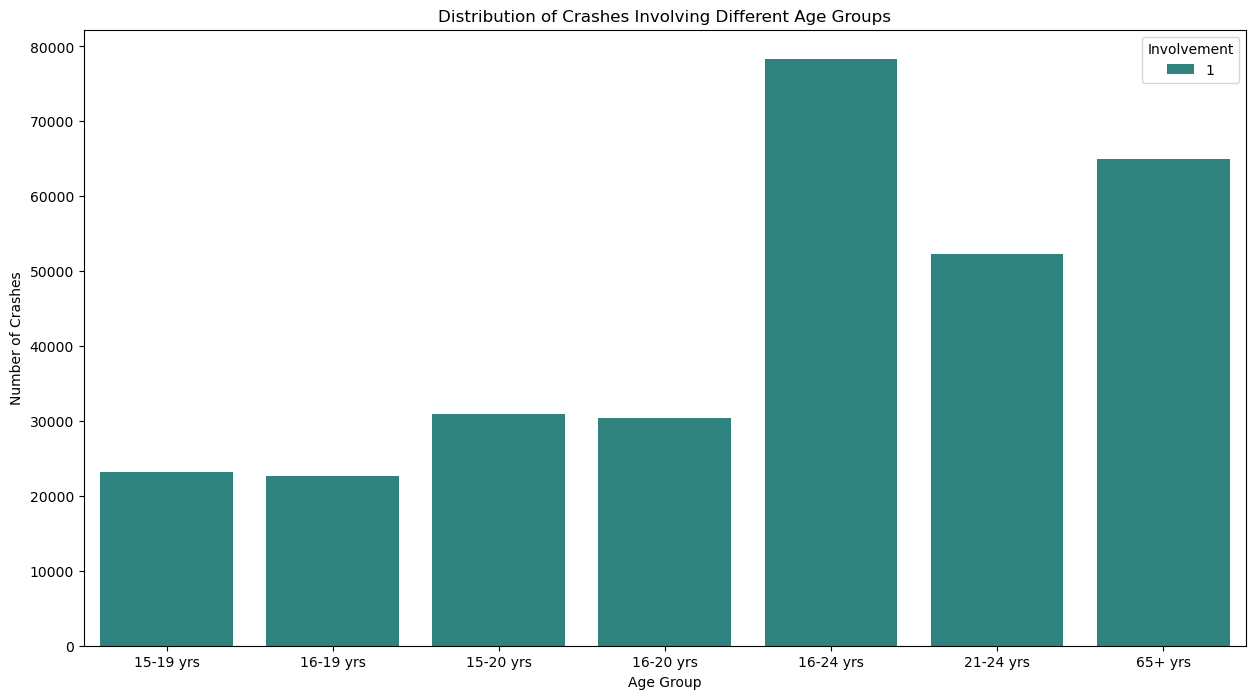

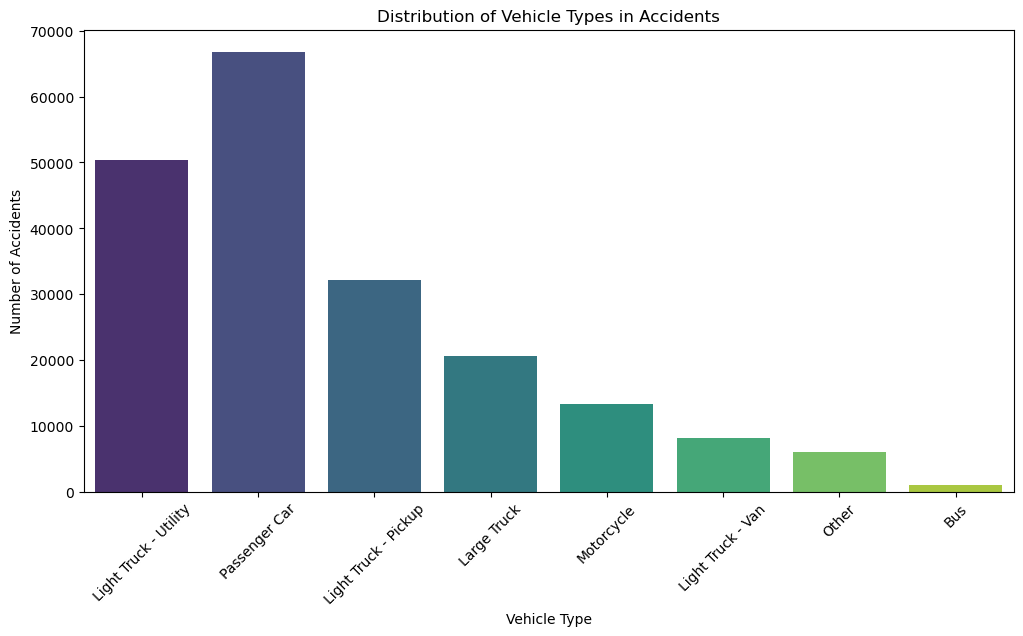

In [20]:

# check the describe for these columns 
print(merged_all[['A_TOD', 'A_DOW', 'A_BODY']].describe())

# Mapping of A_TOD to 1, 2 and 3 
time_of_day_mapping = {
    1: 'Daytime',
    2: 'Nighttime',
    3: 'Unknown'
}

# create a new Time_of_Day column and mapping to it 
merged_all['Time_of_Day'] = merged_all['A_TOD'].map(time_of_day_mapping)

# Create a count plot for the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='Time_of_Day', palette="viridis")
plt.title('Distribution of Accidents by Time of Day (A_TOD)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


#Day of week 
# Mapping of A_DOW
day_of_week_mapping = {
    1: 'Weekday',
    2: 'Weekend',
    3: 'Unknown'
}

# to create a new Day_of_Week column and mapping to it 
merged_all['Day_of_Week'] = merged_all['A_DOW'].map(day_of_week_mapping)

# Create plot for distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='Day_of_Week', palette="viridis")
plt.title('Distribution of Accidents by Day of Week (A_DOW)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()











# age group columns and their labels
age_group_columns = {
    'A_D15_19': '15-19 yrs',
    'A_D16_19': '16-19 yrs',
    'A_D15_20': '15-20 yrs',
    'A_D16_20': '16-20 yrs',
    'A_D16_24': '16-24 yrs',
    'A_D21_24': '21-24 yrs',
    'A_D65PLS': '65+ yrs'
}

# Create a DataFrame 
age_group_data = pd.DataFrame()

for col, label in age_group_columns.items():
    temp_df = merged_all[merged_all[col] == 1][col].value_counts().rename_axis('Involvement').reset_index(name='Count')
    temp_df['Age Group'] = label
    age_group_data = pd.concat([age_group_data, temp_df], ignore_index=True)

# a combined chart
plt.figure(figsize=(15, 8))
sns.barplot(data=age_group_data, x='Age Group', y='Count', hue='Involvement', palette="viridis")
plt.title('Distribution of Crashes Involving Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Crashes')
plt.show()



# Mapping of A_BODY 
vehicle_body_mapping = {
    1: 'Passenger Car',
    2: 'Light Truck - Pickup',
    3: 'Light Truck - Utility',
    4: 'Light Truck - Van',
    5: 'Light Truck - Other',
    6: 'Large Truck',
    7: 'Motorcycle',
    8: 'Bus',
    9: 'Other'
}

# create a new Vehicle_Type column
merged_all['Vehicle_Type'] = merged_all['A_BODY'].map(vehicle_body_mapping)

# Create a count plot for vehicle type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_all, x='Vehicle_Type', palette="viridis")
plt.title('Distribution of Vehicle Types in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


              FATALS  A_CRAINJ       A_POSBAC         A_DIST
count  198458.000000  198458.0  198458.000000  198458.000000
mean        1.620726       1.0       2.575961       1.900941
std         1.487051       0.0       0.756713       0.298742
min         1.000000       1.0       1.000000       1.000000
25%         1.000000       1.0       2.000000       2.000000
50%         1.000000       1.0       3.000000       2.000000
75%         1.000000       1.0       3.000000       2.000000
max        13.000000       1.0       3.000000       2.000000


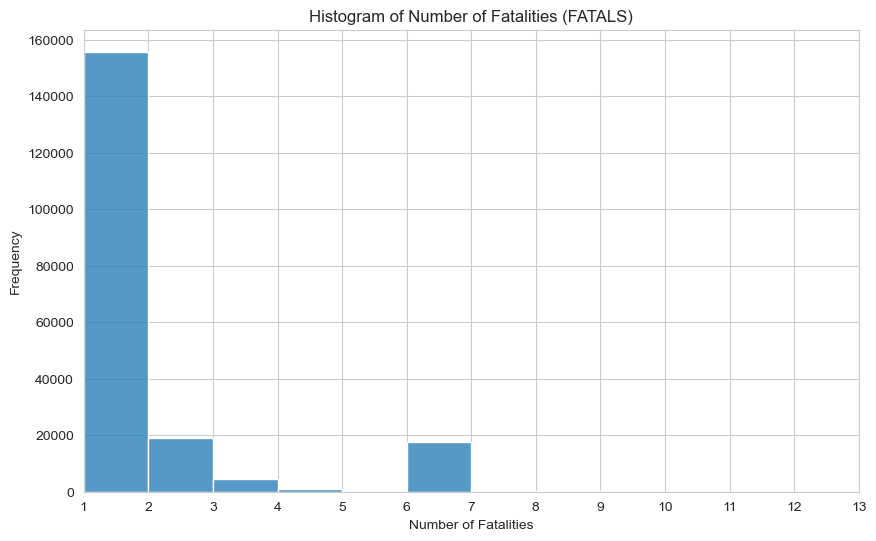

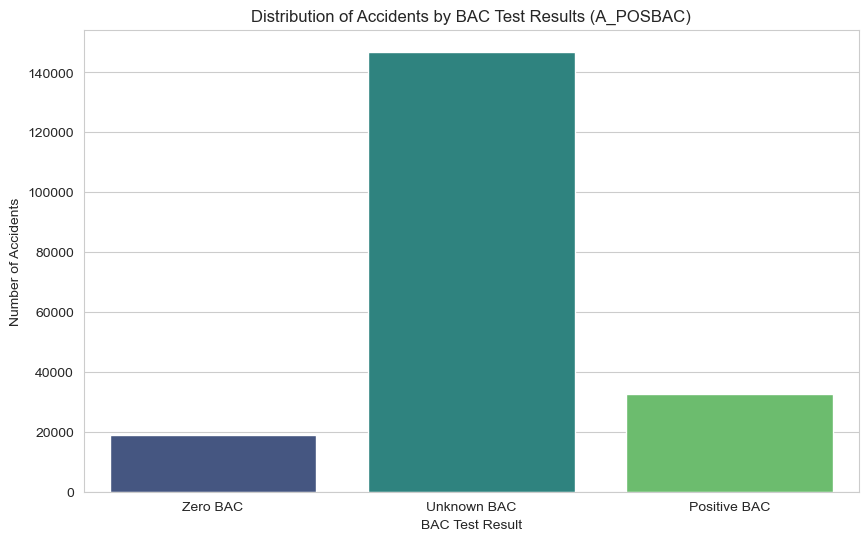

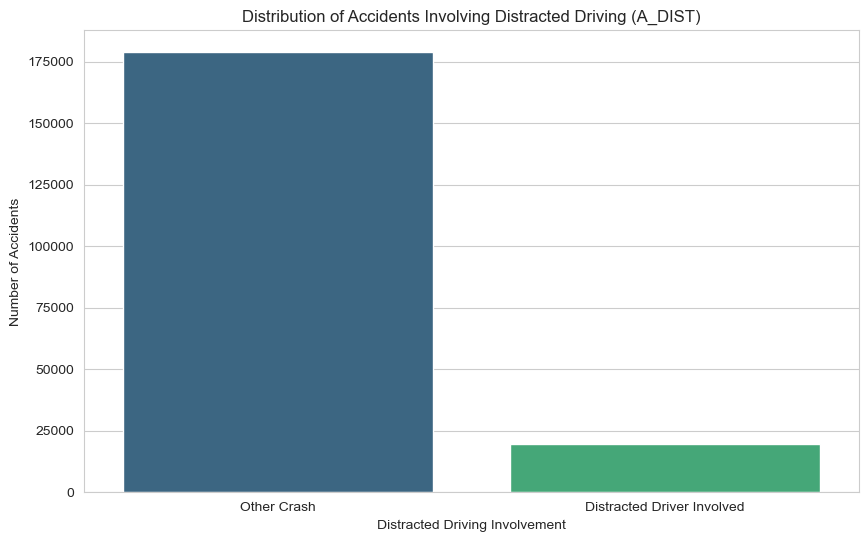

In [21]:


# new features 

print(merged_all[['FATALS', 'A_CRAINJ', 'A_POSBAC', 'A_DIST']].describe())





# Set the style of the plots
sns.set_style("whitegrid")

# Create a histogram for FATALS column
plt.figure(figsize=(10, 6))
# The maximum number of fatalities 
max_fatalities = merged_all['FATALS'].max()
sns.histplot(data=merged_all, x='FATALS', bins=range(1, max_fatalities + 1), kde=False)
plt.title('Histogram of Number of Fatalities (FATALS)')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.xlim(1, max_fatalities)  # Limiting x-axis to the max number of fatalities
plt.xticks(range(1, max_fatalities + 1))  # Set x-axis ticks for each number of fatalities
plt.show()


# Mapping of A_POSBAC 
bac_test_result_mapping = {
    1: 'Positive BAC',
    2: 'Zero BAC',
    3: 'Unknown BAC'
}

# create a new BAC_Test_Result column
merged_all['BAC_Test_Result'] = merged_all['A_POSBAC'].map(bac_test_result_mapping)

# Create a count plot for distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='BAC_Test_Result', palette="viridis")
plt.title('Distribution of Accidents by BAC Test Results (A_POSBAC)')
plt.xlabel('BAC Test Result')
plt.ylabel('Number of Accidents')
plt.show()



# Mapping of A_DIST codes
distraction_involvement_mapping = {
    1: 'Distracted Driver Involved',
    2: 'Other Crash'
}

# to create a new Distracted_Driving column
merged_all['Distracted_Driving'] = merged_all['A_DIST'].map(distraction_involvement_mapping)

# Create a count plot for distracted driving distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_all, x='Distracted_Driving', palette="viridis")
plt.title('Distribution of Accidents Involving Distracted Driving (A_DIST)')
plt.xlabel('Distracted Driving Involvement')
plt.ylabel('Number of Accidents')
plt.show()

# 4. Feature Engineering

### 4.1 Data preparation
* Describe the steps you took to pre-process the dataset

(A) we merged the files and cleaned the missing values. and then we combined them togather. to make the code ACID in order to predcit in correct way 
* Any new files you create, include your python code so it can be replicated (don't include the files)

### 4.2 Feature engineering
* What new features did you build?

(A) Creating a new combined feature for alcohol and distraction involvement
Also I create one for age group 3 to check if any of the group invloved in 'A_POSBAC', 'A_DIST', 'A_RD', 'A_ROLL. 

* Why did your build them?
* Explain in detail your rationale.
* Did you do some data transformation? What did you do and why?

(A) yes to change from catgoraical to numeric 

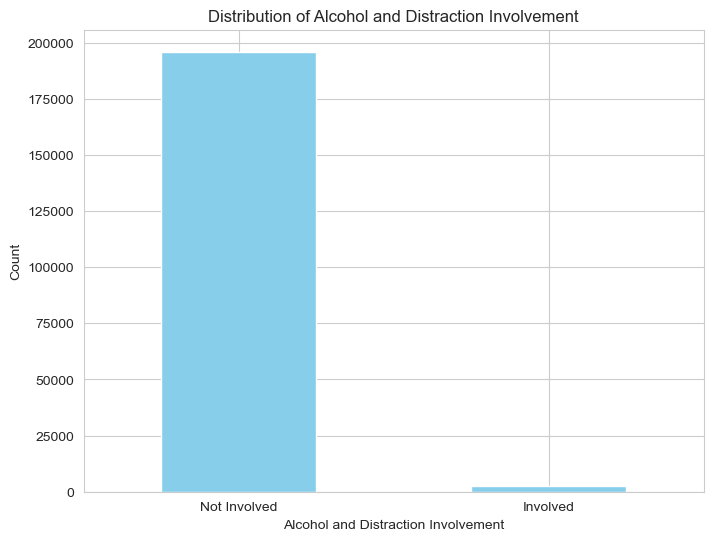

In [22]:
# python code goes here, you can add more code cells below this one if needed
# to better structure your JN
# include any code you use to do data preparation and feature engineering so the process
# can be replicated


# Creating a new combined feature for alcohol and distraction involvement
merged_all['Alcohol_and_Distraction'] = merged_all.apply(lambda x: 1 if x['A_POSBAC'] == 1 and x['A_DIST'] == 1 else 0, axis=1)

merged_all.head()

# Count the occurrences of each value in the 'Alcohol_and_Distraction' column
feature_counts = merged_all['Alcohol_and_Distraction'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
feature_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Alcohol and Distraction Involvement')
plt.xlabel('Alcohol and Distraction Involvement')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Involved', 'Involved'], rotation=0)
plt.show()

In [ ]:


#contributing factors
contributing_factors = ['A_POSBAC', 'A_DIST', 'A_RD', 'A_ROLL']  

# Labels for age groups in A_AGE3
age_group_3_labels = {
    1: "0-3", 2: "4-7", 3: "8-12", 4: "13-15", 5: "16-20", 6: "21-24", 7: "25-34", 
    8: "35-44", 9: "45-54", 10: "55-64", 11: "65-74", 12: "75+", 13: "Unknown"
}

# Aggregating total fatalities and contributing factors for each age groupe 
total_fatalities_age3 = merged_all.groupby('A_AGE3')['FATALS'].sum()
factors_age3 = merged_all.groupby('A_AGE3')[contributing_factors].sum()

# Adding labels to the data to make it more clear 
total_fatalities_age3.index = total_fatalities_age3.index.map(age_group_3_labels)
factors_age3.index = factors_age3.index.map(age_group_3_labels)

# Convert to DataFrame for plotting
total_fatalities_age3_df = total_fatalities_age3.reset_index()
total_fatalities_age3_df.columns = ['Age Group', 'Total Fatalities']
factors_age3_df = factors_age3.reset_index()

# Plotting total fatalities
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Total Fatalities', data=total_fatalities_age3_df, palette="viridis")
plt.title('Total Fatalities by Age Group (A_AGE3)')
plt.xlabel('Age Group')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.show()


In [ ]:
merged_all.head()

# 5. Supervised Learning

* Choose a feature that you want to predict.
* Explain why you choose that feature.
* Select a model you will use
* Build a model
* Use 10-fold CV to evaluate your model, how did you measure (e.g. precision/recall, confusion matrix, square error, etc.) how well it performed.
* Include graphs

CV MSE Mean: 1.9332396149455398, CV MSE Std: 2.277999688819032


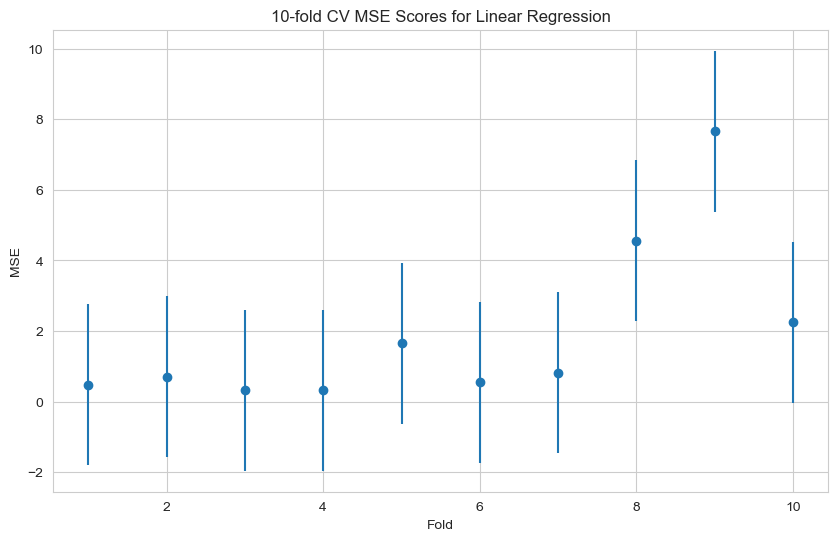

In [33]:


# the predictor variables 
X = merged_all[['A_REGION', 'A_DOW']]

# Define the target variable
y = merged_all['FATALS']


# One-hot encoding for categorical variables A_REGION and A_DOW
column_transformer = ColumnTransformer([
    ("region_encoder", OneHotEncoder(), ["A_REGION"]),
    ("dow_encoder", OneHotEncoder(), ["A_DOW"])
], remainder='passthrough')

X_transformed = column_transformer.fit_transform(X)

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


# the Linear Regression model
model = LinearRegression()


model.fit(X_train, y_train)


# 10-fold Cross-validation
cv_scores = cross_val_score(model, X_transformed, y, cv=10, scoring='neg_mean_squared_error')

# Convert and calculate mean and standard deviation
mse_scores = -cv_scores
cv_mean = mse_scores.mean()
cv_std = mse_scores.std()

print(f'CV MSE Mean: {cv_mean}, CV MSE Std: {cv_std}')


# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(1, 11), mse_scores, yerr=cv_std, fmt='o')
plt.title('10-fold CV MSE Scores for Linear Regression')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.show()


# 6. Clustering (unsupervised learning)

* Explain what would like to learn from the cluster
* Select a model you will use (GMM, K-means, other)
* Build a model
* What distance metric did you use, and why?
* Use 10-fold CV to evaluate your model, how did you measure how well it performed
* Show an elbow graph illustrating different cluster numbers, what is the best one, why?
* Show what are the values for the features for each cluster (centroids).
* What does it tell you about the dataset?
* Include graphs

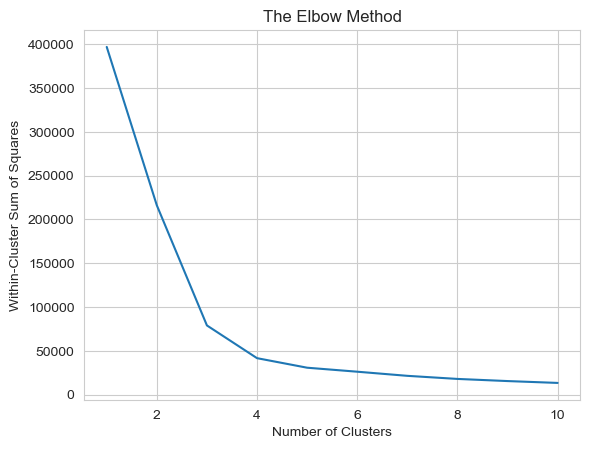

Centroids:
 [[ 1.37728182 -0.30259904]
 [-0.56999542 -0.31518583]
 [ 0.22046346  2.90452311]]


In [30]:


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#  the relevant columns
cluster_data = merged_all[['A_REGION', 'FATALS']]

# Scaling 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Elbow Method to find the optimal number 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)


merged_all['Cluster_Labels'] = cluster_labels

# the centroids
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)



# 7. Conclusions

* What did you learn from this project?
* What limitations does your project have and why?
* What challenges did you face?
* What algorithms/models were used. 
* Why did you choose those algorithms?
* What do you think would be a future work with this dataset you would like to do?


# 8. References and citations

* Include any citation to code you use, websites you visited or any other materials that were used in the project.